In [116]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [117]:
import pandas as pd

data_path = '../blue_berry/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')
origin_submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')

In [118]:
train

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394


In [119]:
test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [120]:
submission

,yield
id,
15289,6025.194
15290,6025.194
15291,6025.194
15292,6025.194
15293,6025.194
...,...
25478,6025.194
25479,6025.194
25480,6025.194


In [121]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN


In [122]:
num_train = len(train)


y = all_data['yield'].iloc[:num_train]

y

id
0        4476.81146
1        5548.12201
2        6869.77760
3        6880.77590
4        7479.93417
            ...    
15284    7667.83619
15285    3680.56025
15286    4696.44394
15287    6772.93347
15288    5867.99722
Name: yield, Length: 15289, dtype: float64

In [123]:
#
# all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

# all_data

In [124]:
corrMat = train[train.columns.tolist()[:]].corr()
corrMat

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963,-0.022517
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082,-0.021940
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360,-0.022319


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

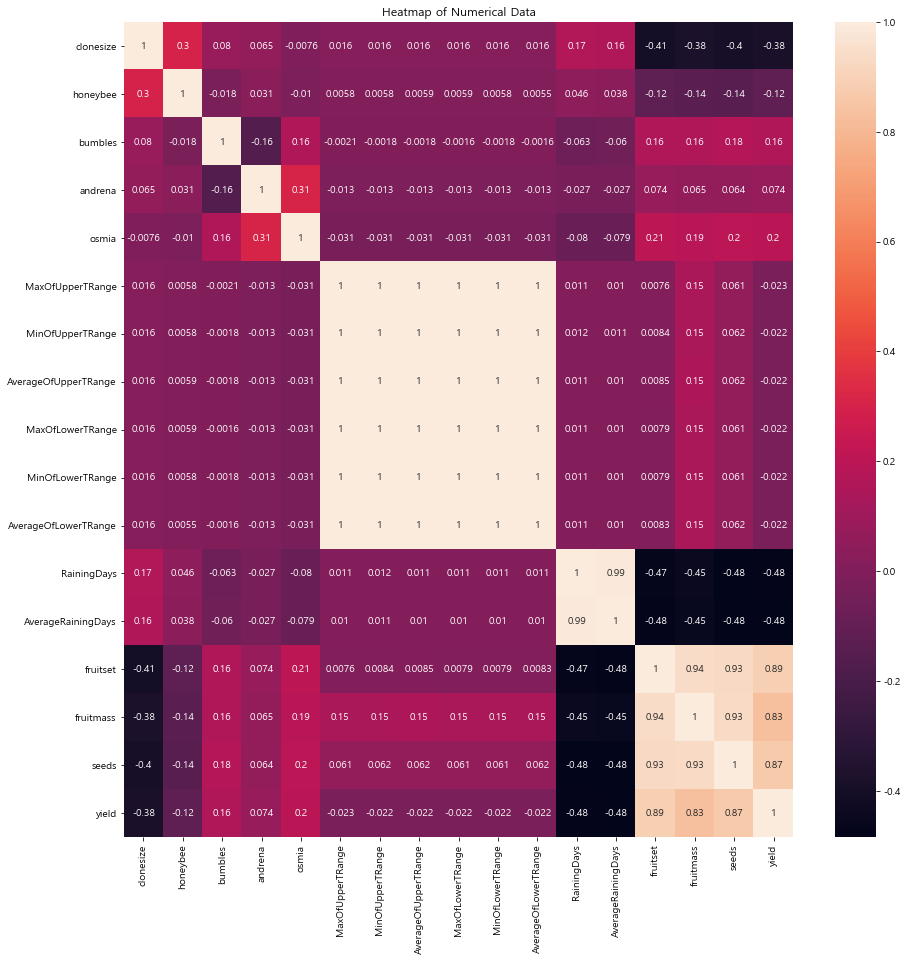

In [125]:
fig,ax = plt.subplots()
fig.set_size_inches(15,15)

sns.heatmap(corrMat , annot =True )
ax.set(title='Heatmap of Numerical Data')

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

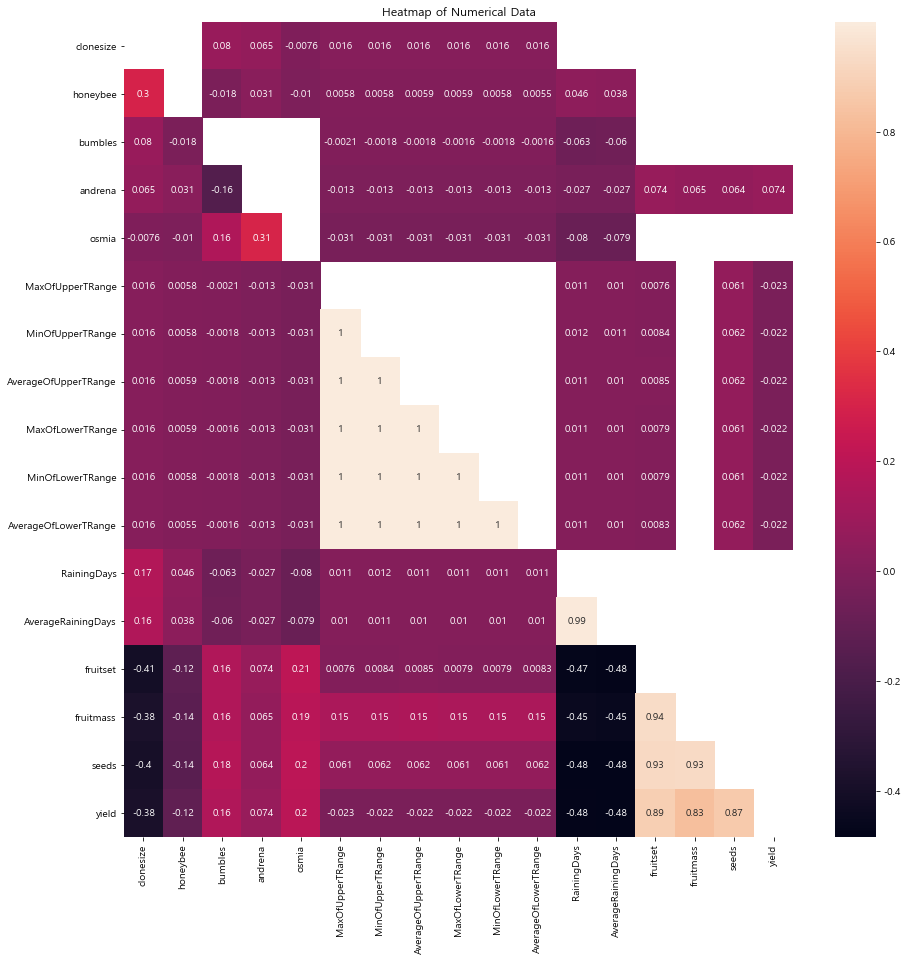

In [126]:
# Mask for correlation values less than 0.1
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
mask = np.zeros_like(corrMat)
mask[np.triu_indices_from(mask)] = True
mask[np.abs(corrMat) < 0.1] = False

sns.heatmap(corrMat, annot=True, mask=mask)
ax.set(title='Heatmap of Numerical Data')


# ['MaxOfUpperTRange' , 'fruitset']

## 변수별 분포 파악

In [127]:
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN


In [128]:
all_data.info() # NULL 값은 없다!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25483 entries, 0 to 25482
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             25483 non-null  float64
 1   honeybee              25483 non-null  float64
 2   bumbles               25483 non-null  float64
 3   andrena               25483 non-null  float64
 4   osmia                 25483 non-null  float64
 5   MaxOfUpperTRange      25483 non-null  float64
 6   MinOfUpperTRange      25483 non-null  float64
 7   AverageOfUpperTRange  25483 non-null  float64
 8   MaxOfLowerTRange      25483 non-null  float64
 9   MinOfLowerTRange      25483 non-null  float64
 10  AverageOfLowerTRange  25483 non-null  float64
 11  RainingDays           25483 non-null  float64
 12  AverageRainingDays    25483 non-null  float64
 13  fruitset              25483 non-null  float64
 14  fruitmass             25483 non-null  float64
 15  seeds              

In [129]:
for column in all_data.columns:
    print("Value counts for column:", column)
    print(all_data[column].value_counts())
    print("-----------------------------")


Value counts for column: clonesize
25.0    13814
12.5    11129
37.5      447
20.0       85
10.0        6
40.0        2
Name: clonesize, dtype: int64
-----------------------------
Value counts for column: honeybee
0.500     13077
0.250     12115
0.750       195
0.537        59
0.000        23
18.430        9
6.640         5
Name: honeybee, dtype: int64
-----------------------------
Value counts for column: bumbles
0.250    18122
0.380     7266
0.117       65
0.000       10
0.042        7
0.585        3
0.065        3
0.058        3
0.293        2
0.560        1
0.260        1
Name: bumbles, dtype: int64
-----------------------------
Value counts for column: andrena
0.380    7649
0.500    6959
0.630    4986
0.750    3063
0.250    2721
0.409      74
0.000      12
0.229       5
0.147       3
0.490       2
0.560       2
0.235       1
0.707       1
0.585       1
0.101       1
0.260       1
0.240       1
0.234       1
Name: andrena, dtype: int64
-----------------------------
Value counts for 

##

clonesize: 5개의 범주화 ==> LabelEncoder() 하자

honeybee : 7개의 범주화 ==> LabelEncoder() 하자

bumbles : 11개의 범주화 ==> 왜도값 치우쳐져있긴 하나 LabelEncoder() 하자

andrena : 여러개의 범주화 ==> qcut을 통해 6개의 LabelEncoder()하면 좋을거 같다

osmia : 여러개의 범주화 ==> qcut을 통해 7개의 LabelEncoder()하면 좋을거 같다.

MaxOfUpperTRange : 7개의 범주화 ==> qcut을 통해 4개의 LabelEncoder()하면 좋을거같다.

MinOfLowerTRange : 7개의 범주화 ==> qcut을 통해 5개의 LabelEncoder()하면 좋을 거 같다.

AverageOfLowerTRange : 5개의 범주화 ==> 그냥 두자

RainingDays : 7개의 범주화 ==> 그냥 두자

AverageRainingDays : 7개의 범주화 ==> 그냥 두자

==> 마지막 3개를 제외하고 걍 범주화로 5개해놓고 OneHotEncoding 하면 될거 같다.


In [130]:
num_train = len(train)
y = all_data['yield'].iloc[:num_train]

all_data = all_data.drop('yield' , axis =1)
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [202]:
# all_data_pca = all_data.iloc[:num_train]
all_data_pca = all_data.iloc[:,:-2]
all_data_pca

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [206]:
from sklearn.decomposition import PCA

# 변수 간의 상관관계 행렬 계산
corr_matrix = all_data_pca.corr()
threshold = 0.99 # 상관관계의 임계값 설정
high_corr_vars = corr_matrix[abs(corr_matrix) >= threshold].stack().index
high_corr_vars = [var[0] for var in high_corr_vars if var[0] != var[1]]
# 상관관계 행렬을 기반으로 PCA 수행
pca = PCA(n_components=1)
pca.fit(corr_matrix)

# 주성분 변환 적용
transformed_data = pca.transform(all_data_pca)

# 변환된 데이터로 업데이트
all_data['PCA_Component'] = transformed_data

# 상관관계가 높은 변수들을 제외한 업데이트된 데이터
selected_vars = [col for col in all_data_pca.columns if col not in high_corr_vars]
updated_data = all_data_pca[selected_vars]
updated_data

,clonesize,honeybee,bumbles,andrena,osmia,fruitset,fruitmass,seeds
id,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,0.568854,0.463065,37.724724


In [131]:
import pandas as pd

# 마지막 3개의 열을 제외한 열 선택
selected_columns = all_data.columns[:-3]
all_data_2 = pd.DataFrame()
# 각 열에 대해 qcut을 사용하여 5개의 범주로 나누기 (중복된 경계값 제거)
for column in selected_columns:
    all_data_2[column + '_Category'] = pd.qcut(all_data[column], q=5, labels=False, duplicates='drop')

all_data_2

,clonesize_Category,honeybee_Category,bumbles_Category,andrena_Category,osmia_Category,MaxOfUpperTRange_Category,MinOfUpperTRange_Category,AverageOfUpperTRange_Category,MaxOfLowerTRange_Category,MinOfLowerTRange_Category,AverageOfLowerTRange_Category,RainingDays_Category,AverageRainingDays_Category
id,,,,,,,,,,,,,
0,1,1,0,3,0,0,0,0,0,0,0,1,2
1,1,1,0,1,0,0,0,0,0,0,0,1,2
2,0,0,0,2,1,1,2,1,1,1,1,1,2
3,0,0,0,2,0,0,1,0,0,0,0,1,2
4,1,1,0,2,1,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,1,0,0,0,0,1,2,1,1,1,1,1,2
25479,1,1,0,1,2,0,1,0,0,0,0,0,1
25480,1,1,1,1,0,0,1,0,0,0,0,0,1


In [169]:
all_data_2.value_counts()

clonesize_Category  honeybee_Category  bumbles_Category  andrena_Category  osmia_Category  MaxOfUpperTRange_Category  MinOfUpperTRange_Category  AverageOfUpperTRange_Category  MaxOfLowerTRange_Category  MinOfLowerTRange_Category  AverageOfLowerTRange_Category  RainingDays_Category  AverageRainingDays_Category  fruitset  fruitmass  seeds    
1                   0                  0                 0                 0               2                          3                          2                              2                          2                          2                              2                     3                            0.315500  0.367763   27.401755    3
0                   0                  0                 0                 0               0                          1                          0                              0                          0                          0                              0                     0                         

In [132]:
import pandas as pd

# 'all_data'의 마지막 3개 열 선택
last_3_columns = all_data.iloc[:, -3:]

# 'all_data_2'와 'last_3_columns' 합치기
all_data_2 = pd.concat([all_data_2, last_3_columns], axis=1)

all_data_2

,clonesize_Category,honeybee_Category,bumbles_Category,andrena_Category,osmia_Category,MaxOfUpperTRange_Category,MinOfUpperTRange_Category,AverageOfUpperTRange_Category,MaxOfLowerTRange_Category,MinOfLowerTRange_Category,AverageOfLowerTRange_Category,RainingDays_Category,AverageRainingDays_Category,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,1,1,0,3,0,0,0,0,0,0,0,1,2,0.425011,0.417545,32.460887
1,1,1,0,1,0,0,0,0,0,0,0,1,2,0.444908,0.422051,33.858317
2,0,0,0,2,1,1,2,1,1,1,1,1,2,0.552927,0.470853,38.341781
3,0,0,0,2,0,0,1,0,0,0,0,1,2,0.565976,0.478137,39.467561
4,1,1,0,2,1,0,1,0,0,0,0,1,2,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,1,0,0,0,0,1,2,1,1,1,1,1,2,0.474162,0.437923,34.525258
25479,1,1,0,1,2,0,1,0,0,0,0,0,1,0.482854,0.440676,35.648221
25480,1,1,1,1,0,0,1,0,0,0,0,0,1,0.568854,0.463065,37.724724


In [133]:
all_data_2.columns.to_list()

['clonesize_Category',
 'honeybee_Category',
 'bumbles_Category',
 'andrena_Category',
 'osmia_Category',
 'MaxOfUpperTRange_Category',
 'MinOfUpperTRange_Category',
 'AverageOfUpperTRange_Category',
 'MaxOfLowerTRange_Category',
 'MinOfLowerTRange_Category',
 'AverageOfLowerTRange_Category',
 'RainingDays_Category',
 'AverageRainingDays_Category',
 'fruitset',
 'fruitmass',
 'seeds']

In [134]:
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # 서브플롯을 생성할 크기 설정
# plt.figure(figsize=(12, 8))
#
# # 피처들의 리스트
# features = features2
#
# # 피처들에 대한 countplot 그리기
# for i, feature in enumerate(features):
#     plt.subplot(3, 2, i+1)
#     sns.countplot(x=feature, hue='yield', data=all_data)
#     plt.title(f'{feature} - yield Countplot')
#
# # 레이아웃 조정
# plt.tight_layout()
#
# # 그래프 출력
# plt.show()

In [135]:
features2 = ['clonesize',
                  'honeybee',
                  'bumbles',
                  'andrena',
                  'osmia',
                  'MaxOfUpperTRange']

In [136]:
# import seaborn as sns
# from scipy.stats import norm
# import matplotlib.pyplot as plt
#
#
# for i, feature in enumerate(features):
#     plt.subplot(4, 4, i+1)
# # 히스토그램과 정규분포 곡선 그리기
#     sns.histplot(all_data[features[i]], kde=True, stat='density', color='skyblue', alpha=0.7)
#     mu, std = norm.fit(all_data['Age'].dropna())
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(x, mu, std)
#     plt.plot(x, p, 'r', linewidth=2)
#     plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')
# plt.show()

## 베이스라인 모델_LightGBM

In [137]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [138]:
%%time

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 회귀 모델 초기화
lgb_model = lgb.LGBMRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [3, 4],                   # 트리의 최대 깊이
    'learning_rate': [0.05 , 0.1],         # 학습률
    'n_estimators': [200, 300]  ,          # 트리의 개수
    'subsample': [0.4 , 0.5],               # 트리를 학습할 때 사용할 샘플링 비율
    'colsample_bytree': [0.9, 1],     # 트리를 학습할 때 사용할 특성의 비율
    'reg_alpha': [0.2 , 0.3],               # L1 정규화 항의 가중치
    'reg_lambda': [0.0, 0.1]               # L2 정규화 항의 가중치
}

# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)


Best Model (LightGBM): LGBMRegressor(colsample_bytree=0.9, learning_rate=0.05, max_depth=4,
              n_estimators=300, reg_alpha=0.2, subsample=0.4)
Best Parameters (LightGBM): {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 0.0, 'subsample': 0.4}
Wall time: 2min 25s


In [139]:
y_preds = best_model_grid_search_lgb.predict(X_test)

y_preds

array([4286.311, 6244.09 , 7168.847, ..., 6462.5  , 4398.639, 7290.912])

In [140]:
# from sklearn.metrics import mean_absolute_error, r2_score
# from skimage.metrics import mean_squared_error
#
# # 평가 지표 계산
# mse = mean_squared_error(y_valid, y_preds)
# # rmse = np.sqrt(mse)
# # mae = mean_absolute_error(y_valid, y_preds)
# # r2 = r2_score(y_valid, y_preds)
#
# print("Mean Squared Error (MSE):", mse)
# # print("Root Mean Squared Error (RMSE):", rmse)
# # print("Mean Absolute Error (MAE):", mae)
# # print("R^2 Score:", r2)

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_lgb.score(X_train, y_train)}')

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
# accuracy = accuracy_score(y_test, y_preds)
# print("Accuracy:", accuracy)

# 정밀도 계산
# precision = precision_score(y_test, y_preds)
# print("Precision:", precision)

# # 재현율 계산
# recall = recall_score(y_test, y_preds)
# print("Recall:", recall)
#
# # F1 스코어 계산
# f1 = f1_score(y_test, y_preds)
# print("F1 Score:", f1)
#
# # ROC AUC 계산
# roc_auc = roc_auc_score(y_test, y_preds)
# print("ROC AUC Score:", roc_auc)

Decsion Tree에 대한 점수 : 0.841718849638408


In [142]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_Lgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [5, 26, 17, 42, 48]


In [143]:
submission

,yield
id,
15289,4286.310867
15290,6244.089653
15291,7168.847198
15292,4684.425263
15293,3878.210708
...,...
25478,5457.407213
25479,5710.531641
25480,6462.499673


In [144]:
all_data_3 = pd.concat([y,all_data_2], axis=1) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data_3

,yield,clonesize_Category,honeybee_Category,bumbles_Category,andrena_Category,osmia_Category,MaxOfUpperTRange_Category,MinOfUpperTRange_Category,AverageOfUpperTRange_Category,MaxOfLowerTRange_Category,MinOfLowerTRange_Category,AverageOfLowerTRange_Category,RainingDays_Category,AverageRainingDays_Category,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,,
0,4476.81146,1,1,0,3,0,0,0,0,0,0,0,1,2,0.425011,0.417545,32.460887
1,5548.12201,1,1,0,1,0,0,0,0,0,0,0,1,2,0.444908,0.422051,33.858317
2,6869.77760,0,0,0,2,1,1,2,1,1,1,1,1,2,0.552927,0.470853,38.341781
3,6880.77590,0,0,0,2,0,0,1,0,0,0,0,1,2,0.565976,0.478137,39.467561
4,7479.93417,1,1,0,2,1,0,1,0,0,0,0,1,2,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,NaN,1,0,0,0,0,1,2,1,1,1,1,1,2,0.474162,0.437923,34.525258
25479,NaN,1,1,0,1,2,0,1,0,0,0,0,0,1,0.482854,0.440676,35.648221
25480,NaN,1,1,1,1,0,0,1,0,0,0,0,0,1,0.568854,0.463065,37.724724


In [145]:
all_data_train = all_data_3.iloc[:num_train]
all_data_train

,yield,clonesize_Category,honeybee_Category,bumbles_Category,andrena_Category,osmia_Category,MaxOfUpperTRange_Category,MinOfUpperTRange_Category,AverageOfUpperTRange_Category,MaxOfLowerTRange_Category,MinOfLowerTRange_Category,AverageOfLowerTRange_Category,RainingDays_Category,AverageRainingDays_Category,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,,
0,4476.81146,1,1,0,3,0,0,0,0,0,0,0,1,2,0.425011,0.417545,32.460887
1,5548.12201,1,1,0,1,0,0,0,0,0,0,0,1,2,0.444908,0.422051,33.858317
2,6869.77760,0,0,0,2,1,1,2,1,1,1,1,1,2,0.552927,0.470853,38.341781
3,6880.77590,0,0,0,2,0,0,1,0,0,0,0,1,2,0.565976,0.478137,39.467561
4,7479.93417,1,1,0,2,1,0,1,0,0,0,0,1,2,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,7667.83619,0,0,0,0,0,0,1,0,0,0,0,0,1,0.556302,0.476308,40.546480
15285,3680.56025,0,0,0,0,0,1,2,1,1,1,1,2,3,0.354413,0.388145,29.467434
15286,4696.44394,1,1,0,0,2,0,1,0,0,0,0,2,3,0.422548,0.416786,32.299059


In [152]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN


In [171]:
import pandas as pd

# 변수 간의 상관관계 계산
corr_matrix = all_data.corr()
corr_matrix
# 'yield' 열과의 상관관계 확인 및 상관관계가 높은 변수 제외
threshold = 0.6  # 상관관계의 임계값 설정
high_corr_vars = corr_matrix[abs(corr_matrix['yield']) > threshold].index
selected_vars = [col for col in all_data.columns if col not in high_corr_vars]

# 선택된 변수와 'yield' 열로 데이터프레임 업데이트
all_data_4 = all_data[selected_vars]
a4 = all_data_4.columns.tolist()

print(a4)
print(all_data_2.columns.tolist())

['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays']
['clonesize_Category', 'honeybee_Category', 'bumbles_Category', 'andrena_Category', 'osmia_Category', 'MaxOfUpperTRange_Category', 'MinOfUpperTRange_Category', 'AverageOfUpperTRange_Category', 'MaxOfLowerTRange_Category', 'MinOfLowerTRange_Category', 'AverageOfLowerTRange_Category', 'RainingDays_Category', 'AverageRainingDays_Category', 'fruitset', 'fruitmass', 'seeds']


In [155]:
all_data_3 = all_data_2.iloc[:, :-3]
all_data_3

,clonesize_Category,honeybee_Category,bumbles_Category,andrena_Category,osmia_Category,MaxOfUpperTRange_Category,MinOfUpperTRange_Category,AverageOfUpperTRange_Category,MaxOfLowerTRange_Category,MinOfLowerTRange_Category,AverageOfLowerTRange_Category,RainingDays_Category,AverageRainingDays_Category
id,,,,,,,,,,,,,
0,1,1,0,3,0,0,0,0,0,0,0,1,2
1,1,1,0,1,0,0,0,0,0,0,0,1,2
2,0,0,0,2,1,1,2,1,1,1,1,1,2
3,0,0,0,2,0,0,1,0,0,0,0,1,2
4,1,1,0,2,1,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,1,0,0,0,0,1,2,1,1,1,1,1,2
25479,1,1,0,1,2,0,1,0,0,0,0,0,1
25480,1,1,1,1,0,0,1,0,0,0,0,0,1


In [156]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_3[:num_train] # 0~num_train -1 행
X_test = all_data_3[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [173]:
%%time

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 회귀 모델 초기화

lgb_model = lgb.LGBMRegressor()
# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [3, 4],                   # 트리의 최대 깊이
    'learning_rate': [0.05 , 0.1],         # 학습률
    'n_estimators': [200, 1000]  ,          # 트리의 개수
    'subsample': [0.4 , 0.5],# 트리를 학습할 때 사용할 샘플링 비율
    'colsample_bytree': [0.9, 1],     # 트리를 학습할 때 사용할 특성의 비율
    'reg_alpha': [0.2 , 0.3],               # L1 정규화 항의 가중치
    'reg_lambda': [0.0, 0.1],               # L2 정규화 항의 가중치
    'objective' : ['regression_l1'],
    'metric' : ['mae'],
    'n_jobs' : [-1]
}

# params = {'objective':'regression_l1',
#           'learning_rate': 0.04, 'max_bin': 1000, 'colsample_bytree': .8,
#           'subsample': .7, 'bagging_freq': 1 ,'metric': 'mae',
#           "n_estimators":2000,'verbosity': -1,'n_jobs': -1,
#
#           }


# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)


Best Model (LightGBM): LGBMRegressor(colsample_bytree=0.9, learning_rate=0.05, max_depth=3,
              metric='mae', n_estimators=200, objective='regression_l1',
              reg_alpha=0.3, reg_lambda=0.1, subsample=0.4)
Best Parameters (LightGBM): {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'metric': 'mae', 'n_estimators': 200, 'objective': 'regression_l1', 'reg_alpha': 0.3, 'reg_lambda': 0.1, 'subsample': 0.4}
Wall time: 6min 30s


In [174]:
# import lightgbm as lgb
#
# params = {'objective': 'regression_l1',
#           'learning_rate': 0.04,
#           'max_bin': 1000,
#           'colsample_bytree': 0.8,
#           'subsample': 0.7,
#           'bagging_freq': 1,
#           'metric': 'mae',
#           'n_estimators': 2000,
#           'verbosity': -1,
#           'n_jobs': -1
#           }
#
# lgb_model = lgb.LGBMRegressor(**params)
# lgb_model.fit(X_train, y_train)


In [175]:
y_preds = best_model_grid_search_lgb.predict(X_test)
y_preds

array([4609.301, 7420.246, 7031.201, ..., 6497.574, 4574.1  , 7281.26 ])

In [178]:
best_model_grid_search_lgb.score(X_test , y_test)

0.9486404611392844

In [179]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_lgb.score(X_train, y_train)}')
#
# # 테스트 데이터에 대한 예측 수행
#
# # 정확도 계산
# # accuracy = accuracy_score(y_test, y_preds)
# # print("Accuracy:", accuracy)
#
# # 정밀도 계산
# # precision = precision_score(y_test, y_preds)
# # print("Precision:", precision)
#
# # # 재현율 계산
# # recall = recall_score(y_test, y_preds)
# # print("Recall:", recall)
# #
# # # F1 스코어 계산
# # f1 = f1_score(y_test, y_preds)
# # print("F1 Score:", f1)
# #
# # # ROC AUC 계산
# # roc_auc = roc_auc_score(y_test, y_preds)
# # print("ROC AUC Score:", roc_auc)

In [180]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_Lgb_2_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [5, 26, 18, 9, 20]


In [181]:
all_data_3

,clonesize_Category,honeybee_Category,bumbles_Category,andrena_Category,osmia_Category,MaxOfUpperTRange_Category,MinOfUpperTRange_Category,AverageOfUpperTRange_Category,MaxOfLowerTRange_Category,MinOfLowerTRange_Category,AverageOfLowerTRange_Category,RainingDays_Category,AverageRainingDays_Category
id,,,,,,,,,,,,,
0,1,1,0,3,0,0,0,0,0,0,0,1,2
1,1,1,0,1,0,0,0,0,0,0,0,1,2
2,0,0,0,2,1,1,2,1,1,1,1,1,2
3,0,0,0,2,0,0,1,0,0,0,0,1,2
4,1,1,0,2,1,0,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,1,0,0,0,0,1,2,1,1,1,1,1,2
25479,1,1,0,1,2,0,1,0,0,0,0,0,1
25480,1,1,1,1,0,0,1,0,0,0,0,0,1


In [207]:
updated_data

,clonesize,honeybee,bumbles,andrena,osmia,fruitset,fruitmass,seeds
id,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,0.568854,0.463065,37.724724


In [208]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= updated_data[:num_train] # 0~num_train -1 행
X_test = updated_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [209]:
%%time

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# LightGBM 회귀 모델 초기화
lgb_model = lgb.LGBMRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [3, 4],                   # 트리의 최대 깊이
    'learning_rate': [0.05 , 0.1],         # 학습률
    'n_estimators': [200, 300]  ,          # 트리의 개수
    'subsample': [0.4 , 0.5],               # 트리를 학습할 때 사용할 샘플링 비율
    'colsample_bytree': [0.9, 1],     # 트리를 학습할 때 사용할 특성의 비율
    'reg_alpha': [0.2 , 0.3],               # L1 정규화 항의 가중치
    'reg_lambda': [0.0, 0.1]               # L2 정규화 항의 가중치
}

# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)


Best Model (LightGBM): LGBMRegressor(colsample_bytree=1, learning_rate=0.05, max_depth=4,
              n_estimators=300, reg_alpha=0.2, reg_lambda=0.1, subsample=0.4)
Best Parameters (LightGBM): {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 0.1, 'subsample': 0.4}
Wall time: 1min 44s


In [210]:
y_preds = best_model_grid_search_lgb.predict(X_test)
y_preds

array([4264.824, 6106.815, 7137.405, ..., 6513.644, 4415.815, 7270.296])

In [211]:
best_model_grid_search_lgb.score(X_test , y_test)

-1.6552969559327462

In [212]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_PCA_Lgb_2_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [5, 26, 18, 32, 14]


## 베이스라인 모델 선형 모델

In [16]:
from sklearn.linear_model import LinearRegression

logistic_model = LinearRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)  # 타깃 변수를 범주형으로 변환하여 모델 훈련


TypeError: __init__() got an unexpected keyword argument 'max_iter'

### 그리드서치 객체 생성

- 그리드서치는 하이퍼파라미터의 값을바꿔가며'모델'의 성능을 교차검증으로 '평가'해 최적의 하이퍼파라미터 값을 찾아준다.

- 비교 검증해볼 하이퍼파라미터 값 목록

- 대상 모델

- 교차 검증용 평가 수단(평가 함수)
## 회귀 평가지표

- 회귀 모델을 훈련해 최적의 회귀계수를 구할 수 있다.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()
import numpy as np

#
def rmsle(y_true, y_pred, convertExp=True):
    # 지수 변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output



# 하이퍼파라미터 값 목록

ridge_params = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# alpha 값이 클수록 규제 강도가 세진다.

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,  # 릿지 모델
                                      param_grid=ridge_params,  # 값 목록
                                      scoring=rmsle_scorer,  # 평가지표,
                                      cv=5)  # 교차검증 분할 수
## 그리드서치 수행
# log_y = np.log(y_train)  # 타깃값 로그변환

gridsearch_ridge_model.fit(X_train, y_train)  # 훈련(그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)
# 예측

preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
#
# print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True) :.4f}')

ridge_model_preds = gridsearch_ridge_model.predict(X_test)
# print(linear_reg_model.score(X_train, preds))

ridge_model_preds
gridsearch_ridge_model


C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
<ipython-input-17-3c211142254d>:20: RuntimeWarning: overflow encountered in square
  output = np.sqrt(np.mean((log_true - log_pred) ** 2))
C:\Users\andyp\anaconda3\lib\site

최적 하이퍼파라미터 : {'alpha': 100, 'max_iter': 3000}


<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-3c211142254d>:13: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
C:\Users\andyp\anaconda3\lib\site-packages\pandas\core\arraylike.p

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [18]:
# 타깃값 1일 확룰 예측

y_preds= gridsearch_ridge_model.predict(X_test)
y_preds

array([4482.82 , 6314.821, 7146.68 , ..., 6500.538, 4622.844, 7381.351])

In [19]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

현재 날짜 및 시각 :  [5, 18, 20, 31]


## 랜덤포레스트 회귀 모델

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
#
# # 모델 생성
# randomforest_model = RandomForestRegressor()
#
# # 그리드서치 객체 생성
# rf_params = {'random_state':[123, 369, 1004], 'n_estimators':[150, 250, 500, 1000],
#              'max_depth':[5, 10, 15, 20, 30], 'max_features':["auto", "sqrt", "log2"]}
#
#
# # randomstate :
# grid_rf_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params, scoring='r2', cv=5)
#
# # estimator = 모델 이름
# # param_grid = 값 목록
# # scoring = 평가지표
# # cv = 교차검증 분할 수
# # log_y = np.log(y_train) # y= X_train['SalesPrice']
# grid_rf_model.fit(X_train, y_train)
# print(grid_rf_model.best_params_)

In [ ]:
# # 예측
#
# preds = grid_rf_model.best_estimator_.predict(X_train)
#
# # 평가
#
# # print(f'랜덤포레스트 RMSLE 값 : {rmsle(log_y , preds , True) :.4f}')
#
# grid_rf_model_preds = grid_rf_model.predict(X_test)
# # print(linear_reg_model.score(X_train,preds))
#
# grid_rf_model_preds

In [ ]:
# y_preds = grid_rf_model_preds
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['yield'] = y_preds
# submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 부스팅 모델 LightGBM 사용해보기

## OOF 예측 방식을 활용한 베이스라인 모델 훈련시키기

In [76]:
from scipy import sparse

all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

# all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]) , encoded_cat_matrix] , format= 'csr')
#
# all_data_sprs
all_data_sprs = sparse.csr_matrix(all_data)
all_data_sprs

<25483x16 sparse matrix of type '<class 'numpy.float64'>'
	with 407673 stored elements in Compressed Sparse Row format>

In [77]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = train['yield'].values

In [78]:
import numpy as np

def eval_gini(y_true , y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0] # 데이터 개수
    L_mid = np.linspace(1/ n_samples ,1 , n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true) # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [79]:
# LightGBM 용 gini() 함수

def gini(preds , dtrain):
    labels = dtrain.get_label()

    return 'gini' , eval_gini(labels , preds ) , True

In [80]:
# OOF 방식으로 LightGBM 훈련
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기

folds = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1991)

# 층화 K 폴드 교차 검증기는 타깃값이 불균형하므로 K폴드가 아닌 층화 K폴드를 수행하는 게 바람직하다. 층화 K폴드는 타깃값이 균등하게
# 폴드를 나누는 방식이기 때문이다.


# n_splits 파라미터로 전달한 수만큼 폴드를 나눈다. 여기서는 5개로 나누었다. shuffle = True 를 전달하면 폴드를 나눌때 데이터를 섞어준다.

In [81]:
# LightGBM의 하이퍼파라미터를 설정한다. LightGBM은 하이퍼파라미터를 갖고 있지만, 여기서는 4가지만 설정한다.

params = {'objective' : 'binary' , 'learning_rate' : 0.01 , 'force_row_wise' : True , 'random_state' : 0}

# 이진분류 문제이므로 objective 파라미터는 binary로 설정했다. 학습률은 0.01로, 랜덤 스테이트 값은 9으로 설정했다.
# force_row_wise : True 는 경고 문구를 없애려고 추가한 파라미터이다.

In [82]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])

# ==> oof_val_preds 는 검증 데이터를 활용해 예측한 확률값을 저장하는 배열이다. K 폴드로 나누어도 훈련 데이터 전체가 결국엔 한 번씩 검증 데이터로 활용된다. 따라서 oof_val_preds 배열 크기는 훈련 데이터와 같아야 한다.
# 훈련 데이터 개수는 X.shpae[0]으로 구한다.

# OOF 방식으로 훈련된 모델로 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# oof_test_preds는 테스트 데이터를 활용해 예측한 확률값을 저장하는 배열이다. 최종 제출에 사용할 값이므로 크기는 테스트 데이터와 같아야한다. 테스트 데이터 개수는 X_test.shape[0]으로 구한다.

In [83]:
X

<15289x16 sparse matrix of type '<class 'numpy.float64'>'
	with 244589 stored elements in Compressed Sparse Row format>

In [84]:
y

array([4476.811, 5548.122, 6869.778, ..., 4696.444, 6772.933, 5867.997])

In [86]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련 , 검증 , 예측
print( i for i in folds.split(X,y))
#
for idx, (train_idx , valid_idx) in enumerate(folds.split(X, y)):
    print(idx)
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx +1} / 폴드 {folds.n_splits}' , '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터 셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터 셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round = 1000, # 부스팅 반복 횟수
                          valid_sets=  dvalid ,  # 성능 평가용 검증 데이터 셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds = 100, # 조기종료 조건
                          verbose_eval = 100 ) # 100번째마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측 확률에 대한 정규화 지니계수

    gini_score = eval_gini(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx +1} 지니계수 : {gini_score}\n')

<generator object <genexpr> at 0x000001CCDA42DE40>


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
print('OOF 검증 데이터 지니계수 : ' , eval_gini(y , oof_val_preds))